- [ ] Upload more data

In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

In [54]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('final_data.csv', index_col=0)
df['tpep_pickup_dth'] = pd.to_datetime(df['tpep_pickup_dth'], format = '%Y-%m-%d %H:%M:%S')
df.head()

C:\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,region,tpep_pickup_dth,trips
0,1,2016-05-01 00:00:00,0.0
1,1,2016-05-04 22:00:00,0.0
2,1,2016-05-04 23:00:00,0.0
3,1,2016-05-05 00:00:00,0.0
4,1,2016-05-05 01:00:00,0.0


In [4]:
df.groupby(by='region',as_index=False).sum().sort_values(by='trips', ascending=False).head()

,region,trips
1280,1281,638799.0
1230,1231,552503.0
1179,1180,519623.0
1229,1230,489489.0
1228,1229,476106.0


# 1.  
**Выберите одну из зон среди отобранных на прошлой неделе, возьмите по ней все подготовленные данные о количестве поездок. Не используйте данные за последний имеющийся месяц — июнь 2016! Создайте регрессионные признаки для учёта сезонностей и трендов.**

## 1.1. Выберем region - **1180**

In [10]:
df1 = df[df['region'] == 1180][['tpep_pickup_dth', 'trips']].set_index('tpep_pickup_dth').sort_index()
ts = df1['trips']

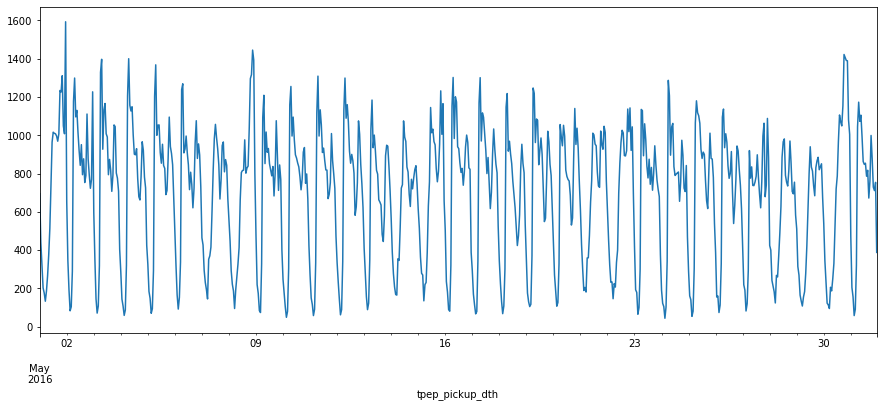

In [35]:
ts.plot(figsize=(15,6))

# 1.2. Регрессионный признаки

In [30]:
k=5

df1 = df1.assign(si=0.)
df1 = df1.assign(ci=0.)

for i, row in df1.iterrows():
    t = df1.index.get_loc(i)
    row['si'] = math.sin(t*2*math.pi*k/168)
    row['ci'] = math.cos(t*2*math.pi*k/168)

In [32]:
df1.head()

,trips,si,ci
tpep_pickup_dth,,,
2016-05-01 00:00:00,695.0,0.000000,1.000000
2016-05-01 01:00:00,441.0,0.185912,0.982566
2016-05-01 02:00:00,325.0,0.365341,0.930874
2016-05-01 03:00:00,203.0,0.532032,0.846724
2016-05-01 04:00:00,176.0,0.680173,0.733052


# 2.

In [38]:
X = df1[['si', 'ci']]
y = df1['trips']

In [42]:
lasso = Lasso()
scores = cross_val_score(lasso ,X, y, cv=5)
scores

array([-0.01877637,  0.00649166,  0.00216617,  0.00123878, -0.05481274])

In [45]:
lasso_fit = lasso.fit(X,y)

In [49]:
mean_squared_error(y, lasso_fit.predict(X))

117173.04618245501